<a href="https://colab.research.google.com/github/salmanbhatti87/CodeSoft/blob/main/resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os

In [2]:
# Load the dataset from TensorFlow
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=dataset_url, extract=True)
dataset_dir = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'validation')

In [3]:
import tensorflow as tf
import os

dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
path_to_zip = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=dataset_url, extract=True)

dataset_dir = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

# Verify dataset structure
print("Dataset directory exists:", os.path.exists(dataset_dir))
print("Subdirectories:", os.listdir(dataset_dir) if os.path.exists(dataset_dir) else "Not found")

train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'validation')

print("Train directory exists:", os.path.exists(train_dir))
print("Validation directory exists:", os.path.exists(val_dir))


Dataset directory exists: True
Subdirectories: ['train', 'vectorize.py', 'validation']
Train directory exists: True
Validation directory exists: True


In [4]:
import os
import tensorflow as tf

# Get the default storage path for datasets
dataset_path = tf.keras.utils.get_file(
    'cats_and_dogs_filtered.zip',
    origin="https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
)

print("Downloaded file path:", dataset_path)


Downloaded file path: /root/.keras/datasets/cats_and_dogs_filtered.zip


In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, applications
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os

In [27]:
# Define paths
data_dir = "/root/.keras/datasets/cats_and_dogs_filtered"
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "validation")

# Load datasets
train_data = keras.preprocessing.image_dataset_from_directory(
    train_dir, image_size=(224, 224), batch_size=32
)

val_data = keras.preprocessing.image_dataset_from_directory(
    val_dir, image_size=(224, 224), batch_size=32
)

# Normalize pixel values to [0,1]
normalization_layer = layers.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
val_data = val_data.map(lambda x, y: (normalization_layer(x), y))

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [28]:
# Load the pre-trained ResNet model (excluding the top layers)
base_model = applications.ResNet50(
    input_shape=(224, 224, 3), include_top=False, weights="imagenet"
)

# Freeze the base model layers
base_model.trainable = False

# Build the final model
model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),  # Flatten feature maps
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dense(1, activation='sigmoid')  # Output layer (Binary classification)
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,850,113 (90.98 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [30]:
# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=40  # Adjust as needed
)

Epoch 1/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 122ms/step - accuracy: 0.6105 - loss: 0.6441 - val_accuracy: 0.5970 - val_loss: 0.6592
Epoch 2/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.6324 - loss: 0.6454 - val_accuracy: 0.6250 - val_loss: 0.6343
Epoch 3/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - accuracy: 0.6423 - loss: 0.6315 - val_accuracy: 0.6540 - val_loss: 0.6334
Epoch 4/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - accuracy: 0.6319 - loss: 0.6338 - val_accuracy: 0.6510 - val_loss: 0.6292
Epoch 5/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - accuracy: 0.6325 - loss: 0.6265 - val_accuracy: 0.6350 - val_loss: 0.6308
Epoch 6/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.6243 - loss: 0.6354 - val_accuracy: 0.6130 - val_loss: 0.6562
Epoch 7/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.6507 - loss: 0.6296 - val_accuracy: 0.6370 - val_loss: 0.6295
Epoch 8/40
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.6130 - loss: 0.6579 - val_accura

32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 226ms/step
Classification Report:
               precision    recall  f1-score   support

         Cat       0.64      0.77      0.70       500
         Dog       0.71      0.56      0.63       500

    accuracy                           0.67      1000
   macro avg       0.67      0.67      0.66      1000
weighted avg       0.67      0.67      0.66      1000



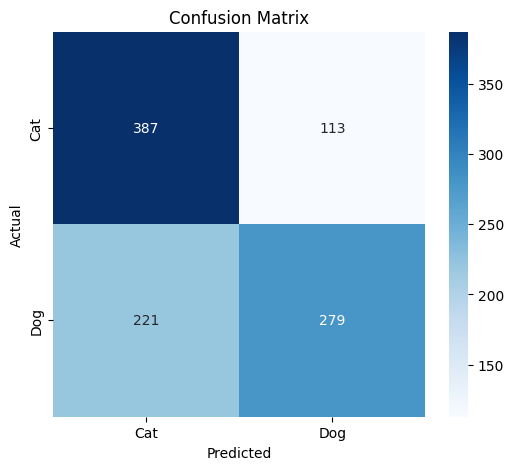

In [31]:
# Extract validation labels
val_images, val_labels = [], []
for images, labels in val_data:
    val_images.append(images.numpy())
    val_labels.extend(labels.numpy())

val_images = np.concatenate(val_images, axis=0)
val_labels = np.array(val_labels)

# Get predictions
predictions = model.predict(val_images)
predicted_labels = (predictions > 0.5).astype(int)

# Compute classification report
report = classification_report(val_labels, predicted_labels, target_names=['Cat', 'Dog'])
print("Classification Report:\n", report)

# Plot confusion matrix
conf_matrix = confusion_matrix(val_labels, predicted_labels)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

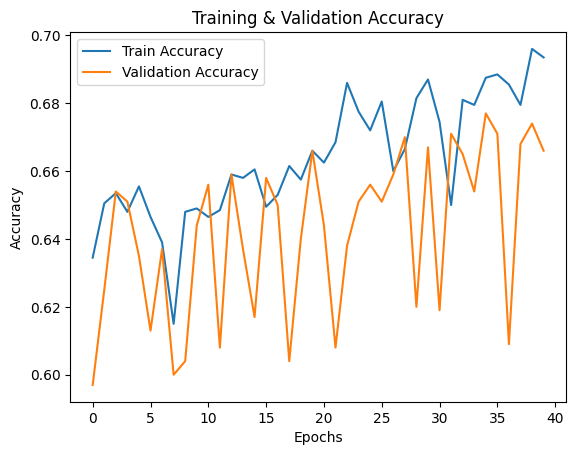

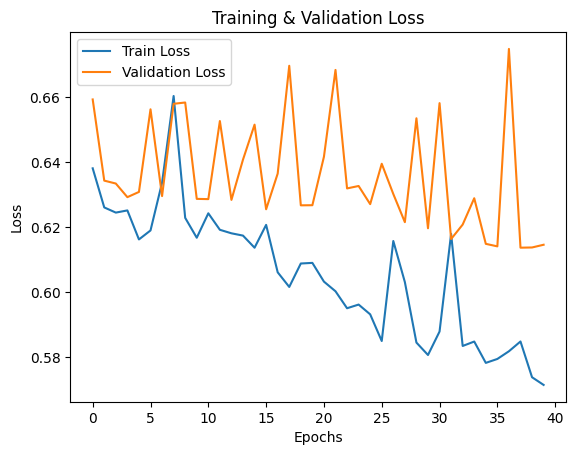

In [32]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()